In [2]:
# http://scikit-learn.org/stable/tutorial/machine_learning_map/
import os
import numpy as np

PATH_TO_DATA = "../architecture/feature-maps/"
# example
# DF_MAP = "VGG16-example_dfmap"
# LABELS = "VGG16-example_imgLabels"

# real
DF_MAP = "VGG16-dfmap"
LABELS = "VGG16-imgLabels"

In [3]:
# with open("filename.pkl", "wb") as f:
#     pickle.dump(dictname, f)
# ...
# with open("filename.pkl", "rb") as f:
#     dictname = pickle.load(f)

# open the files
import pickle

features = pickle.load(open(os.path.join(PATH_TO_DATA,DF_MAP),'rb'))
labels = pickle.load(open(os.path.join(PATH_TO_DATA,LABELS),'rb'))

In [5]:
# data format and structure --> need to get np.array?

# features --> image x deep features
print("Deep features - deep feature map")
print()
print("Structure dims: %dx%d. Structure type: %s" % (features.shape[0], features.shape[1], type(features.shape)))
print("N of deep features arrays: ", features.shape[0])
print("N of deep features: ",features.shape[1])
print(features) # array with deep features

print()
print()

# labels --> list with image's cat

print("Image's labels")
print("Structure: ", type(labels))
print("N of images: ", len(labels))
print(labels) # img's label

# so we have to reduce the colums number (deep features)

Deep features - deep feature map

Structure dims: 5000x4096. Structure type: <class 'tuple'>
N of deep features arrays:  5000
N of deep features:  4096
[[ 1.59203267  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.45862061  0.          0.        ]
 [ 3.66870189  0.          0.         ...,  9.95420551  0.          0.        ]
 ..., 
 [ 0.          1.27594543  0.         ...,  0.          0.29772317  0.        ]
 [ 0.          0.          0.         ...,  0.81036121  0.          0.        ]
 [ 0.          0.1871326   0.         ...,  0.          0.          0.        ]]


Image's labels
Structure:  <class 'list'>
N of images:  5000
['01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMOR', '01_TUMO

In [16]:
# tuple to np.array ? this is mandatory ? check it out



features_array = np.array(features)

features_array = features_array.T # we transposed the dfmap in order to get PCA right

print(type(features_array))
print()
print(features_array.shape)
print()
print(features_array)

print(type(labels_array))
print()
print(labels_array.shape)
print()
print(labels_array)

<class 'numpy.ndarray'>

(4096, 5000)

[[ 1.59203267  0.          3.66870189 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  1.27594543  0.          0.1871326 ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.45862061  9.95420551 ...,  0.          0.81036121  0.        ]
 [ 0.          0.          0.         ...,  0.29772317  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
<class 'numpy.ndarray'>

(5000,)

['01_TUMOR' '01_TUMOR' '01_TUMOR' ..., '08_EMPTY' '08_EMPTY' '08_EMPTY']


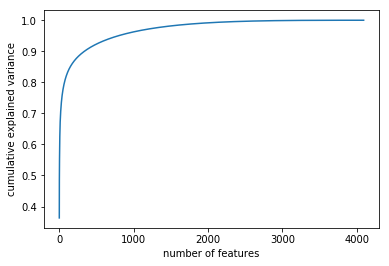

In [17]:
# CPA - cumulative explained variance ratio

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

'''
oficial
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
interesting
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Nota: son 4096 dimensiones (features) a reducir y no sabemos a cuantas por eso realizamos la
grafica de la varianza explicada acumulada en funcion del numero de dimensiones
'''
# calcs
features_model_CPA = PCA().fit(features_array) # model

# plot
plt.plot(np.cumsum(features_model_CPA.explained_variance_ratio_))
plt.xlabel('number of features')
plt.ylabel('cumulative explained variance')

# print (pca.explained_variance_ratio_.cumsum()) # numpy.ndarray


In [ ]:
# plot 


In [ ]:
# importante repasar
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)


In [18]:
# get the right number of features
# mejorar el output
# np.arange does weird outputs np.arange(0.7,0.95,0.05) vs np.arange(0.7,1,0.05)

for i in np.arange(0.7,1,0.05):
    print("With %d features we get %f of cumulative explicative variance." % \
          (np.argmax(features_model_CPA.explained_variance_ratio_.cumsum() > i), i))

With 18 features we get 0.700000 of cumulative explicative variance.
With 35 features we get 0.750000 of cumulative explicative variance.
With 70 features we get 0.800000 of cumulative explicative variance.
With 148 features we get 0.850000 of cumulative explicative variance.
With 338 features we get 0.900000 of cumulative explicative variance.
With 794 features we get 0.950000 of cumulative explicative variance.
With 4090 features we get 1.000000 of cumulative explicative variance.


 saber que features han sido seleccionadas¿?

In [19]:
# so we reduce to 800 features aprox 95% of cummulative explicative variance

features_model_CPA = PCA(n_components=800) # fixed number of features
features_model_CPA.fit(features_array)




PCA(copy=True, iterated_power='auto', n_components=800, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# we check the data
print(features_model_CPA.components_.shape) # output 800x5000 800 features x 5000 images

print(features_model_CPA.components_.T.shape) # transpose again to get the correct structure

(800, 5000)
(5000, 800)


In [23]:
# we save the data check the path!!!!
import pickle
pickle.dump(features_model_CPA.components_.T, open('../architecture/feature-maps/VGG16-dfmap-PCA', 'wb'))

In [24]:
# new model characteristics

# features_model_CPA --> model
# features_model_CPA.components_ --> ndarray con las componentes
# features_model_CPA.components_.shape imgs x deepfeatures

print(type(features_model_CPA.components_.T))
print(len(features_model_CPA.components_.T))
print(features_model_CPA.components_.T.shape)

# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<class 'numpy.ndarray'>
5000
(5000, 800)


In [ ]:
# saving the model for future analysis
# http://scikit-learn.org/stable/modules/model_persistence.html
# https://pythonhosted.org/joblib/persistence.html

# from sklearn.externals import joblib


In [ ]:
# http://scikit-learn.org/stable/modules/feature_selection.html
# https://stackoverflow.com/questions/23294616/how-to-use-scikit-learn-pca-for-features-reduction-and-know-which-features-are-d